# Final Project Group 7 (CS 556-A)
## Team Member
- Thanapoom Phatthanaphan
- Sparsh Oza
- Mikhil Sankoorikkal

# Q1. Housing Price Prediction

Dataset Description: The data pertains to the houses found in each California district and some summary statistics about them based on the 1990 census data. It contains one instance per district block group. A block group is the smallest geographical unit for which the U.S. Census Bureau publishes sample data (a block group typically has a population of 600 to 3,000 people). 

The goal of this task is to design a regression model to predict the median house value conditioned upon a set of input attributes corresponding to a particular California district block. 

The attributes in the dataset are as follows; their names are self-explanatory: 
     

    longitude (continuous): One of the coordinates that are used to identify the California district block 
     

    latitude (continuous): One of the coordinates that are used to identify the California district block 
     

    housing_median_age (continuous): Average age of the house in California district block 
     

    total_rooms (continuous): Total number of rooms of all the houses in the California district block 
     

    total_bedrooms (continuous): Total number of bedrooms of all the houses in the California district block 
     

    population (continuous): Number of people residing in the district block 
     

    households (continuous): Number of families in the district block 
     

    median_income (continuous): Median income for households in the district block of houses (measured in tens of thousands of US Dollars)  
     

    ocean_proximity (categorical): Location of the house. Is it inland, near the bay, near the ocean, etc.  
     

    median_house_value.(continuous): Median house value within a district block (measured in US Dollars)

Our target variable will be median_house_value.  Use the rest of the fields mentioned above to predict the median_house_value. 

## Import Libraries
Import all necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.decomposition import PCA
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
%matplotlib inline

### b. Data Loading / Preprocessing

#### i. Loading

1. Load the California housing dataset using `pandas.read_csv()` function and store it in the variable (i.e., a pandas dataframe) named `df’.

2. The resulting data frame should have the shape (20640, 10) indicating that there are 20640 rows and 10 columns.

In [2]:
df = pd.read_csv("housing.csv")
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


3. Find the missing values in the data frame. If any (i.e., even if one column in each instance / row has a missing value), drop the row using `pandas.DataFrame.dropna()` function. The resulting data frame should have the shape (20433, 10) indicating that there are 20433 rows and 10 columns.

In [3]:
df = df.dropna()
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


4. Create a data frame `corr_df` by dropping the columns latitude, longitude, and ocean_proximity using the `pandas.DataFrame.drop()` function. Use the Pearson correlation to find the correlation of each remaining feature in the `corr_df` with the target variable `median_house_value` using the function `pandas.DataFrame.corrwith()`. 

In [4]:
corr_df = df.drop(['latitude', 'longitude', 'ocean_proximity'],axis=1)
corr_pear = corr_df.corrwith(df['median_house_value'])
print(corr_pear)

housing_median_age    0.106432
total_rooms           0.133294
total_bedrooms        0.049686
population           -0.025300
households            0.064894
median_income         0.688355
median_house_value    1.000000
dtype: float64


In [5]:
X = df.drop('median_house_value',axis=1)
Y = df['median_house_value']

#### ii. Data Visualization

1. Use `pandas.DataFrame.hist(bins = 50)` function for visualizing the variation on the columns housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value. Plot each histogram as a separate subplot.

array([[<AxesSubplot: title={'center': 'housing_median_age'}>,
        <AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>],
       [<AxesSubplot: title={'center': 'population'}>,
        <AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>],
       [<AxesSubplot: title={'center': 'median_house_value'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

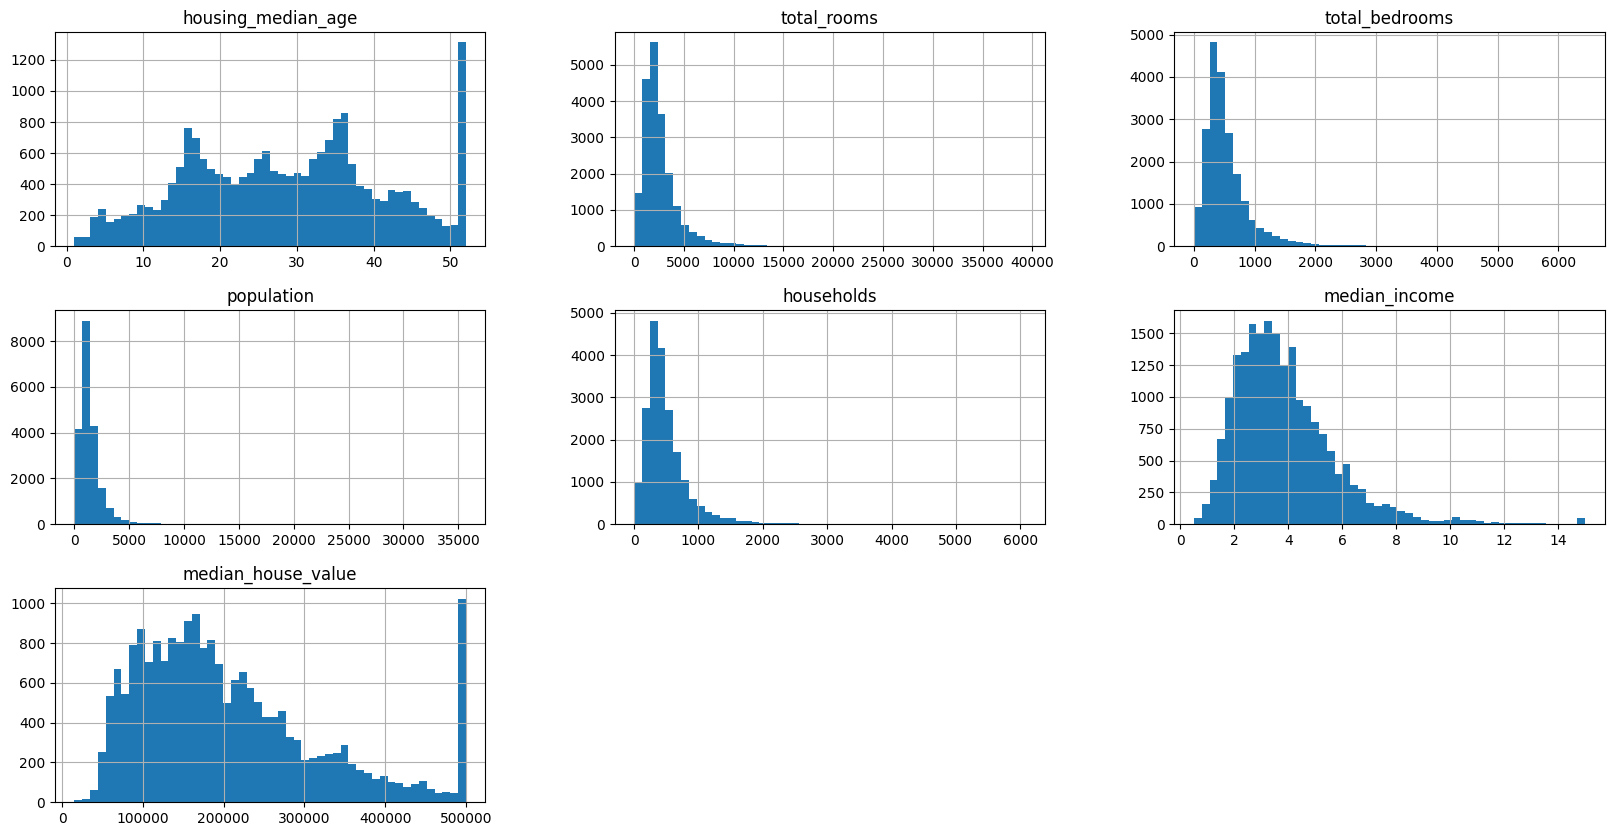

In [6]:
corr_df.hist(bins=50,figsize=(20,10))

2. Use `pandas.dataframe.describe()` function to find the mean, median and standard deviations for each feature and report in the jupyter notebook.

In [7]:
summary_stats = df.describe()

means = summary_stats.loc['mean']
medians = summary_stats.loc['50%']
stds = summary_stats.loc['std']

print("Means:\n", means)
print("\nMedians:\n", medians)
print("\nStandard Deviations:\n", stds)

Means:
 longitude               -119.570689
latitude                  35.633221
housing_median_age        28.633094
total_rooms             2636.504233
total_bedrooms           537.870553
population              1424.946949
households               499.433465
median_income              3.871162
median_house_value    206864.413155
Name: mean, dtype: float64

Medians:
 longitude               -118.4900
latitude                  34.2600
housing_median_age        29.0000
total_rooms             2127.0000
total_bedrooms           435.0000
population              1166.0000
households               409.0000
median_income              3.5365
median_house_value    179700.0000
Name: 50%, dtype: float64

Standard Deviations:
 longitude                  2.003578
latitude                   2.136348
housing_median_age        12.591805
total_rooms             2185.269567
total_bedrooms           421.385070
population              1133.208490
households               382.299226
median_income          

3. Use `pandas.get_dummies` to convert categorical variables into dummy /one-hot encoding. In this case the categorical column is ocean_proximity 

In [8]:
# Convert categorical variable into dummy
dummies = pd.get_dummies(X['ocean_proximity'], prefix=['ocean_proximity'])

# Concatenate new columns after converting to the dataframe, and remove the originial column "ocean_proximity"
new_X = pd.concat([X, dummies], axis=1)
new_X = new_X.drop('ocean_proximity', axis=1)
new_X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,['ocean_proximity']_<1H OCEAN,['ocean_proximity']_INLAND,['ocean_proximity']_ISLAND,['ocean_proximity']_NEAR BAY,['ocean_proximity']_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,0,1,0,0,0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,0,1,0,0,0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,0,1,0,0,0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,0,1,0,0,0


#### iii. Data Splitting

1. Split data into training and test sets using the sklearn `train_test_split()` function. Perform 70-30 distribution i.e. 70% training and 30% testing. The result of your data split should yield 4 separate data frames `X_train, X_test, y_train, y_test`. (respectively, the training features, testing features, training targets and testing target).

In [9]:
X_train, X_test, y_train, y_test = train_test_split(new_X, Y, test_size=0.3, random_state=42)

#### iv. Data Scaling

1. Use the `StandardScaler()` to instantiate the standard scaler class. Note: You will need two separate scaler objects, one to scale the features, another to scale the target values. 

In [10]:
# Scaler object for scaling the features
scaler_X = StandardScaler()

# Scaler object for scaling the target values
scaler_y = StandardScaler()

2. For each scaler, employ the `fit_transform()` function (only on the training  features, training targets) of the scaler to retrieve the new (scaled) version of the data. Store them in `X_train`, and `y_train` again

In [11]:
X_train = scaler_X.fit_transform(X_train)

# Reshape y_train from 1D-dimensional to 2D-dimensional
y_train = y_train.values.reshape(-1, 1)
y_train = scaler_y.fit_transform(y_train)

3. Scale the `X_test` and `y_test` as well and store the scaled values back in `X_test` and `y_test`. (i.e., use the appropriate “fitted” scaler above to “transform” the test data. Note: the function to be employed in this case is `transform()` as opposed to `fit_transform()`).  
Henceforth, `X_train, y_train, X_test, y_test` will refer to the scaled data unless stated otherwise.

In [12]:
X_test = scaler_X.transform(X_test)

# Reshape y_test from 1D-dimensional to 2D-dimensional
y_test = y_test.values.reshape(-1, 1)
y_test = scaler_y.transform(y_test)

4. Use `pandas.DataFrame.hist(bins = 50)` function for visualizing the variation of numerical attributes housing_median_age, total_rooms, total_bedrooms, population, household, median_income and median_house_value for the `X_train` and `y_train` dataset (similar to step b.ii.1 above). Once again, plot each histogram as a separate subplot. 

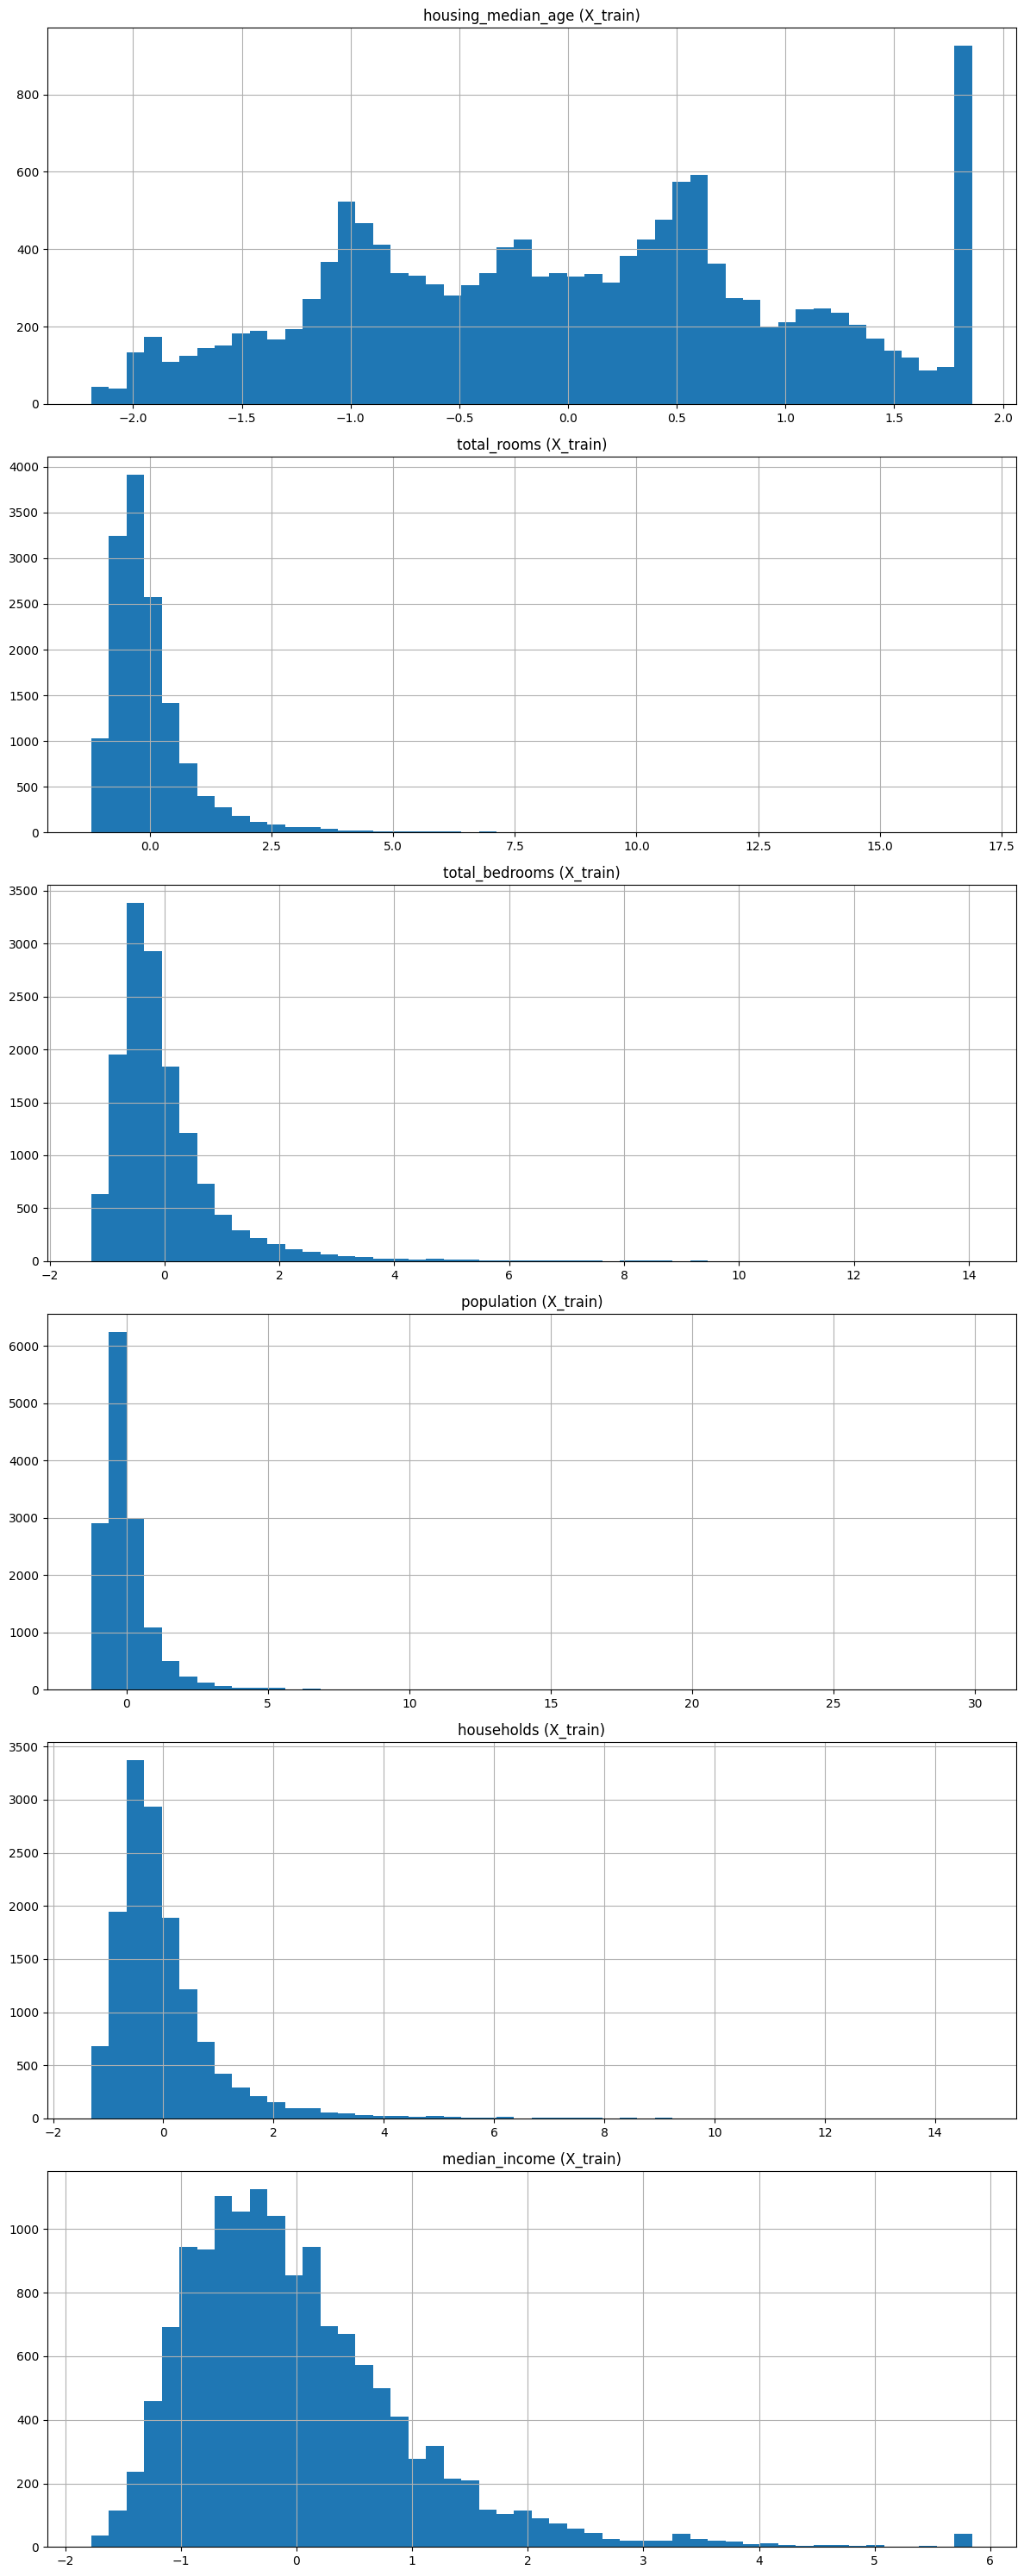

In [13]:
X_train_df = pd.DataFrame(X_train, columns = ['longitude', 'latitude', 'housing_median_age','total_rooms','total_bedrooms','population','households','median_income', 'ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN'])

# The variation of numerical attributes for X_train
numerical_attributes_X = ['housing_median_age', 'total_rooms', 'total_bedrooms','population', 'households', 'median_income']

# Create a histogram for each column in X_train
fig, axs = plt.subplots(nrows=6, ncols=1, figsize=(12, 30))

for i, attribute in enumerate(numerical_attributes_X):

        X_train_df[attribute].hist(bins=50, ax=axs[i])
        axs[i].set_title(attribute + ' (X_train)')
    
plt.tight_layout()
plt.show()

array([[<AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

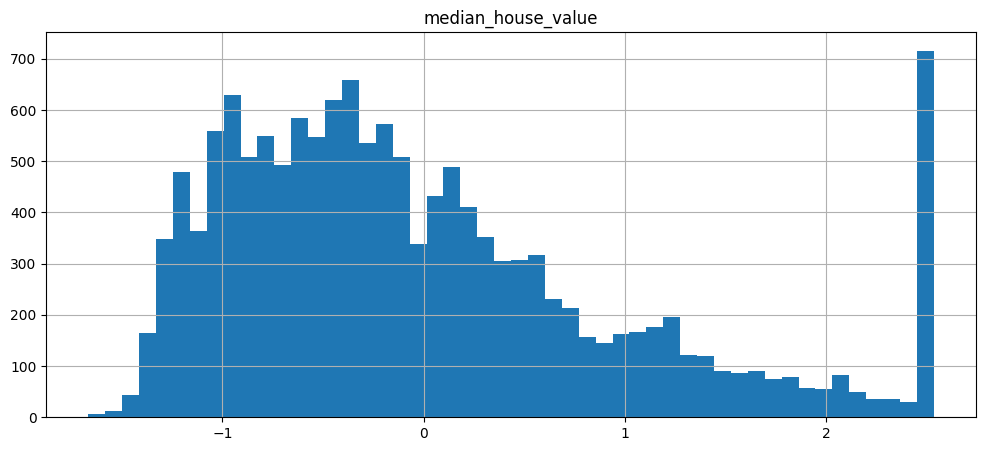

In [14]:
y_train_df = pd.DataFrame(y_train, columns = ['median_house_value'])
y_train_df.hist(bins=50, figsize=(12, 5))

### c. Modelling

#### i. Employ Linear Regression from sklearn.linear_model, and instantiate the model.

In [15]:
Lin_Reg = LinearRegression()

#### ii. Once instantiated, `fit()` the model using the scaled `X_train, y_train` data.

In [16]:
Lin_Reg.fit(X_train, y_train)

LinearRegression()

In [17]:
new_X.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,['ocean_proximity']_<1H OCEAN,['ocean_proximity']_INLAND,['ocean_proximity']_ISLAND,['ocean_proximity']_NEAR BAY,['ocean_proximity']_NEAR OCEAN
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,0,0,0,1,0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,0,0,0,1,0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,0,0,0,1,0


In [18]:
features_cols = ['longitude', 
                 'latitude', 
                 'housing_median_age', 
                 'total_rooms', 
                 'total_bedrooms', 
                 'population', 
                 'households', 
                 'median_income', 
                 "['ocean_proximity']_<1H OCEAN", 
                 "['ocean_proximity']_INLAND", 
                 "['ocean_proximity']_ISLAND", 
                 "['ocean_proximity']_NEAR BAY", 
                 "['ocean_proximity']_NEAR OCEAN"
                ]

weights_Lin_Reg = Lin_Reg.coef_
# print(coef_Lin_Reg)
weights_Lin_Reg_df = pd.DataFrame(data=weights_Lin_Reg, index=['Coefficient'], columns=features_cols).T
weights_Lin_Reg_df_sorted = weights_Lin_Reg_df.sort_values(by='Coefficient', ascending=False, key=lambda x: abs(x))
weights_Lin_Reg_df_sorted

,Coefficient
['ocean_proximity']_<1H OCEAN,3.295362e+11
['ocean_proximity']_INLAND,3.074514e+11
['ocean_proximity']_NEAR OCEAN,2.216716e+11
['ocean_proximity']_NEAR BAY,2.099481e+11
['ocean_proximity']_ISLAND,7.839580e+09
median_income,6.479077e-01
latitude,-4.655787e-01
longitude,-4.595197e-01
total_bedrooms,3.849580e-01
population,-3.502038e-01


#### iii. Employ the `predict()` function to obtain predictions on `X_test`. Store the predictions in a variable named `y_preds`. Note: Since the model has been trained on scaled data (i.e., both features and targets, the predictions will also be in the “scaled” space. We need to transform the predictions back to the original space). 

In [19]:
y_preds = Lin_Reg.predict(X_test)

#### iv. Use `inverse_transform()` function to convert the normalized data (`y_preds` ) to original scale. Store the transformed values back into `y_preds`.

In [20]:
y_preds = scaler_y.inverse_transform(y_preds)
y_preds

array([[202156.74027324],
       [147460.66693408],
       [208655.38826311],
       ...,
       [143452.28676472],
       [ 49355.73840404],
       [ 93497.23250111]])

#### v. Perform PCA on the features (`X_train`) and set `n_component` as 2.

In [21]:
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)

1. Show a scatter plot where on the x-axis we plot the first PCA component and second component on the y-axis.

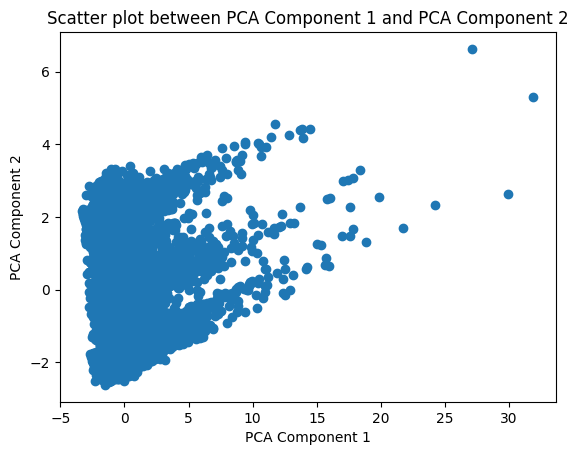

In [22]:
plt.scatter(X_train_pca[:,0], X_train_pca[:,1])
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter plot between PCA Component 1 and PCA Component 2')
plt.show()

2. Calculate the total percentage of variance captured by the 2 PCA components using `pca.explained_variance_ratio_`. Also, report the strength of each PCA component using `pca.singular_values_`.

In [23]:
pca.explained_variance_ratio_

array([0.30110561, 0.19742525])

In [24]:
explained_var_ratio = pca.explained_variance_ratio_
singular_vals = pca.singular_values_

total_var = sum(explained_var_ratio) * 100

print(f"Total variance captured by 2 PCA components: {total_var:.2f}%")
print(f"Strength of the first PCA component: {singular_vals[0]:.2f}")
print(f"Strength of the second PCA component: {singular_vals[1]:.2f}")

Total variance captured by 2 PCA components: 49.85%
Strength of the first PCA component: 236.62
Strength of the second PCA component: 191.60


### d. Evaluation

#### i. Plot a scatter plot using matplotlib.pyplot.scatter function. Plot the predicted median house values on the y-axis vs the actual median house values on the x-axis

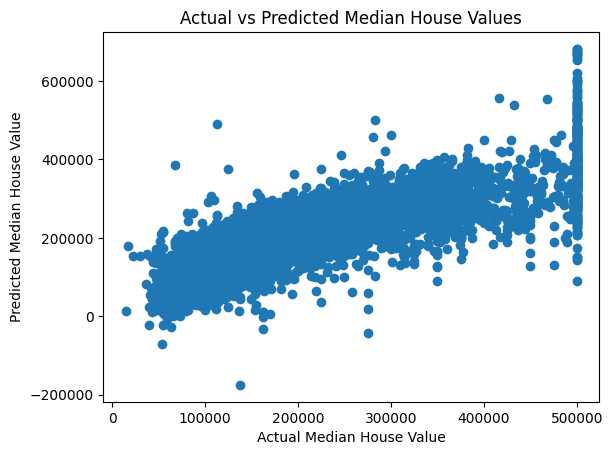

In [25]:
# Rescale y_test back to the original value as same as y_preds that we rescaled in the above quesiton (c.iv)
y_test = scaler_y.inverse_transform(y_test)

plt.scatter(y_test, y_preds)
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title("Actual vs Predicted Median House Values")
plt.show()

#### ii. Calculate MAPE, RMSE and R2 for the model and report them in the following table.  
Hint: for RMSE set the squared parameter to False.

In [26]:
from prettytable import PrettyTable
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score

# Compute MAPE, multiply by 100 to display the output as percentage
mape = mean_absolute_percentage_error(y_test, y_preds) * 100

# Compute RMSE
rmse = mean_squared_error(y_test, y_preds, squared=False)

# Compute R2
r2 = r2_score(y_test, y_preds)

# Create a table instance
table = PrettyTable()

# Add columns
table.add_column("Metric", ["MAPE", "RMSE", "R2"])
table.add_column("Value", [mape, rmse, r2])

# Print the table
print(table)

ModuleNotFoundError: No module named 'prettytable'